# ECE 311 Lab 2: LSI Systems
## Due Date: 2/14 @ 11:59PM on Canvas
In this lab, we will explore Linear Shift-Invariant (LSI) systems and their properties with applications involving toy signals, image filtering, stock data, and even an example of a simple non-linear system. Let's get started!

In [217]:
#import necessary libraries for this lab
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

from skimage.io import imread

%matplotlib inline

## Getting Started with Convolution

We remember from ECE 210, that convolution describes how any continuous-time input signal is processed by an LTI system. Given an input $x(t)$ and an LTI system's impulse response $h(t)$, the system output $y(t)$ is given by

$$
y(t) = x(t) * h(t).
$$

Recall that convolution for continous signals is defined as

$$
y(t) = \int_{\tau = -\infty}^{\infty}x(\tau)h(t-\tau)d\tau = \int_{\tau=-\infty}^{\infty}x(t-\tau)h(\tau)d\tau.
$$

You have learned in ECE 310 that discrete-time LSI systems also have an impulse response $h[n]$, which is the system response to a unit Kronecker delta $\delta[n]$ input. Thus we can express the system output given an input signal via discrete-time convolution.

$$
y[n] = x[n] * h[n]
$$

$$
y[n] = \sum_{k=-\infty}^{\infty}x[k]h[n-k] = \sum_{k=-\infty}^{\infty}x[n-k]h[k]
$$

Like the width properties of continuous-time convolution, if $x$ is of length $N$ and $h$ is of length $M$, the result $y$ will be of length $N+M-1$. It is important to note that every LSI system can be represented by a convolution, every system that can be expressed as a convolution has an impulse response, and any system with an impulse response must be LSI. This means the relationship between LSI systems, convolution, and impulse responses is an "if and only if" relationship; they all imply one another! This is something handy to keep in mind whenever you want to identify and describe an LSI system.

The key function we will use to perform convolutions is the $\textrm{convolve()}$ function in the $\textrm{scipy.signal}$ module. The usage of this function for an example system is as follows:

$$
x[n] = \delta[n]+2\delta[n-2]+3\delta[n-4]
$$

$$
h[n] = x[n]+3x[n-1]
$$

In [218]:
x = np.array([1, 0, 2, 0, 3]) #input signal
h = np.array([1, 3]) #filter/system's impulse response
y = signal.convolve(x,h) #signal.convolve(in1,in2)

print(y) #verify this result by hand!

[1 3 2 6 3 9]


Note how we extracted the system's impulse response for the system's Linear Constant Coefficient Difference Equation (LCCDE). Our first term takes the present input value and multiplies it by one, and the second term multiplies the most recent input by three. Intuitively, when we flip and shift our filter $h$ for the convolution, we will be applying this system to the input signal at each shift step. The $\textrm{signal.convolve()}$ function assumes the arrays that represent our signals begin at index zero.

## Exercise 1: Implementing LSI Systems

In the below code cell, implement the following LSI systems and plot the system response (using $\textrm{plt.stem()}$) to each of the listed input signals. Comment on the results in the following Markdown cell. Remember to determine the LCCDE for each system to infer its impulse response!

* System A: $y_a[n] = -x[n]+2x[n-1]-x[n-2]$


* System B: $y_b[n] = \frac{1}{4}x[n]+\frac{1}{2}x[n-1]+\frac{1}{4}x[n-2]$



* $x_1[n] = u[n] - u[n-7], 0\leq n< 10$


* $x_2[n] = \sin\left(\frac{\pi}{20}n\right), 0\leq n< 40$

Text(0, 0.5, 'Yb2[n]')

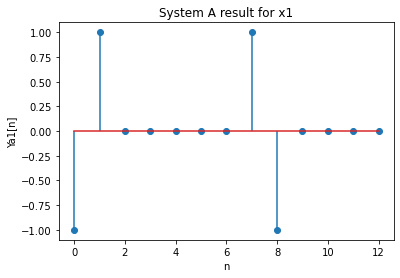

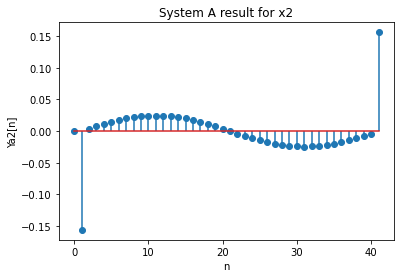

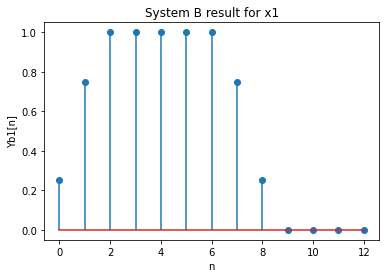

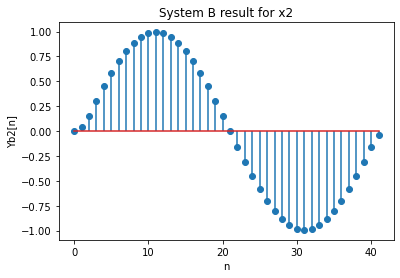

In [219]:
#create input signals here:
#Hint: Use np.sin and np.pi!
x1 = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
x2 = np.array(np.sin(np.pi/20*np.linspace(0,39,40)))
#System A
ya = np.array([-1,2,-1])
#plot result for x1
Ya1 = signal.convolve(x1, ya)
Ya1_vals = range(len(Ya1)) #x-axis values
plt.figure()
plt.title('System A result for x1')
plt.stem(Ya1_vals, Ya1)
plt.xlabel('n')
plt.ylabel('Ya1[n]')
#plot result for x2
Ya2 = signal.convolve(x2, ya)
Ya2_vals = range(len(Ya2)) #x-axis values
plt.figure()
plt.title('System A result for x2')
plt.stem(Ya2_vals, Ya2)
plt.xlabel('n')
plt.ylabel('Ya2[n]')
#System B
yb = np.array([0.25, 0.5, 0.25])
#plot result for x1
Yb1 = signal.convolve(x1, yb)
Yb1_vals = range(len(Yb1)) #x-axis values
plt.figure()
plt.title('System B result for x1')
plt.stem(Yb1_vals, Yb1)
plt.xlabel('n')
plt.ylabel('Yb1[n]')
#plot result for x2
Yb2 = signal.convolve(x2, yb)
Yb2_vals = range(len(Yb2)) #x-axis values
plt.figure()
plt.title('System B result for x2')
plt.stem(Yb2_vals, Yb2)
plt.xlabel('n')
plt.ylabel('Yb2[n]')

Comments here:
(Consider how the different filters affect the flatter and faster moving parts of the input signals. What do you think each filter is doing?)
<ol>
    <li> System A: The convolutional image returned by system A appears to have the function of "marking" changes in signal values. When the signal value does not change or is small, the convolution result value is 0 or small. Where the original signal changes drastically, the convolution signal will oscillate violently up and down.
    <li> System B: System B appears to have the effect of passivation and feathering changes, because the convolution image it generates appears that the transition part is smoother and the excessive change is smaller. It may be used as a softening of the signal
<ol\>


## Exercise 2: Bitcoin Pricing Correction

One type of signal could be some non-physical 1D information. An example of this would be stock price or cryptocurrency data. This data is notoriously noisy and can jump around unpredictably.

Remember that the systems we work with can be either causal or non-causal. A causal system only uses present and past information or values to calculate its present values, while a non-causal system can leverage future information. In this excercise, we will compare causal and non-causal versions of a filter to smooth a day's worth of bitcoin pricing data. We have provided 24 hours of prices with pricing updates every minute (1440 points). The date in question is Christmas Eve Day (12/24), 2017.

Text(0, 0.5, 'Price (USD)')

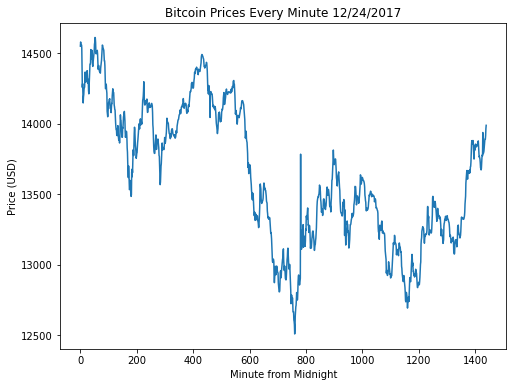

In [220]:
bitcoin_data = np.load('bitcoin-christmas.npy', allow_pickle=True)
n_points = len(bitcoin_data)
plt.figure(figsize = (8,6))
plt.plot(range(n_points), bitcoin_data)
plt.title('Bitcoin Prices Every Minute 12/24/2017')
plt.xlabel('Minute from Midnight')
plt.ylabel('Price (USD)')

Pretty noisy, right? Maybe a lot of last-minute Christmas gifts made the price even more unpredictable!

In this exercise, you will implement two length-51 moving average filters on this Bitcoin price data. The first will be causal and the second will be non-causal. Mathematically, we can represent these systems as follows:

$$
y_1[n] = \frac{1}{51}\sum_{i=0}^{50}x[n - i]
$$

$$
y_2[n] = \frac{1}{51}\sum_{i=-25}^{25}x[n - i]
$$

Furthermore, since the moving average filter is an LSI system we may implement it as a convolution. If you are having trouble seeing this, we suggest considering a length-5 moving average filter and "unrolling" the sum for that system definition.

Notice that the non-causal filter will require us to access negative indices according to the impulse response of our filter. A natural question to ask is how does the $\textrm{signal.convolve()}$ function perform non-causal convolution? How can you indicate negative indices when making an array for a system's impulse response? This is where the "same" mode comes in! We may use the "same" mode as follows:

```
y = signal.convolve(x,h,'same'),
```

where $x$ is of length $N$ and $h$ is length $M$. This line of code will perform a full linear convolution like the default mode, but then it will only keep the center $N$ values (length of first argument/array). This operation is equivalent to zero-centering our filter array (second argument/array). You may want to try a couple small examples to convince yourself this is true. The "same" mode will be important to keep in mind throughout this lab and the rest of the course.

**Important Note:** For the following two parts, we have provided the appropriate start and end indices to help us make sure each implementation returns results of the same size and to remove initial condition worries (ramping behavior since we would have fewer than 51 samples as the filter has partial overlap).

a. Construct the causal filter and apply it to the provided bitcoin price data (contained in the ``bitcoin_data`` variable). To make sure your output is the same length and matches up correctly in time, you should slice your result using ``start`` and ``end`` as we did to create the ``plotting_data`` variable. Plot the original data (``plotting_data``) and your smoothed data on the same plot.

b. Construct the non-causal filter and apply it to the provided bitcoin price data. Perform the same ``start`` and ``end`` slicing on your result as in part (a). Plot the original data (``plotting_data``) and your smoothed data on the same plot.

c. Plot the error signals for each filter on the same plot. Let the error signal for a system's output be given by

$$
y_e = y - \hat{y},
$$

where $\hat{y}$ is your system output and $y$ is the sliced original data used for plotting, ``plotting_data``.

d. Comment on the results in the following Markdown cell. What is noticeably different? Is it better to know a lot of past information or a decent amount of past and future information?

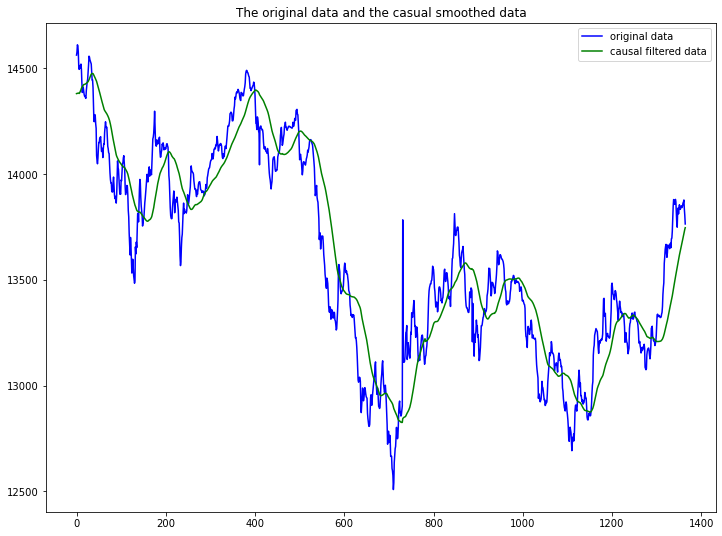

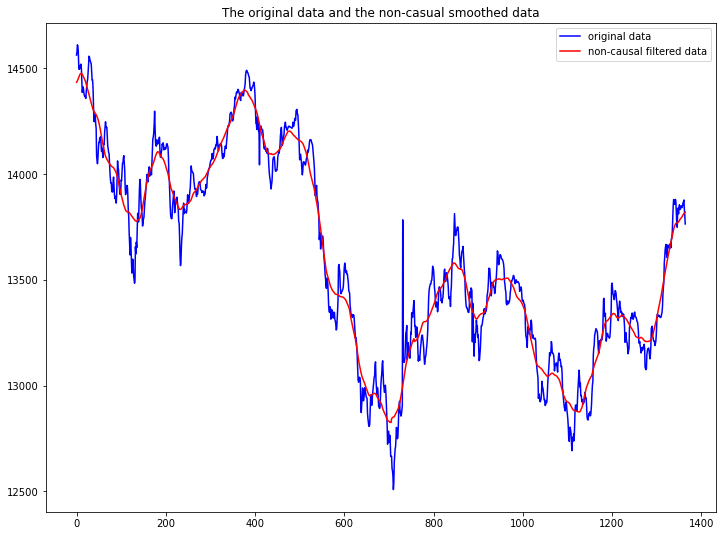

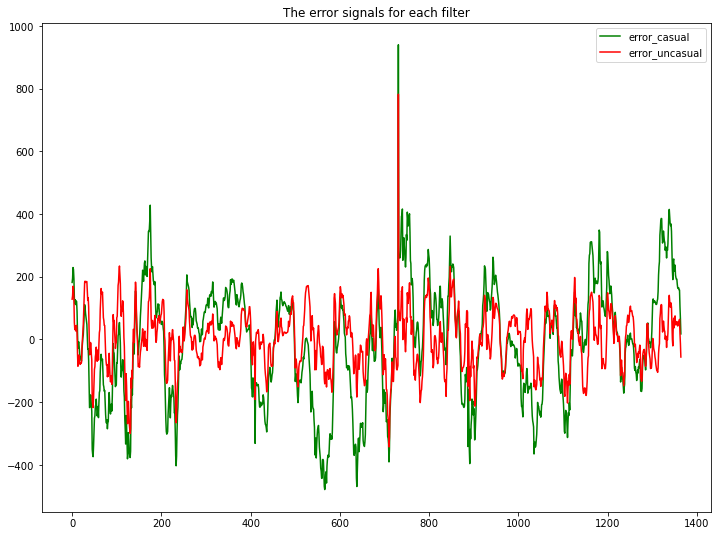

In [221]:
#Provided code
L = 51
half_L = 25
start = 50
end = len(bitcoin_data)-half_L
plotting_data = bitcoin_data[start:end] #plot against this data in parts a/b, pay attention to how we slice
result_length = len(plotting_data)
# Code for 2.a here, don't forget to plot original and filtered signals on same plot
plt.figure(figsize = (12,9))
h1 = np.ones(L)/51
y1 = signal.convolve(bitcoin_data, h1)
y1_slice = y1[start:end]
plt.plot(range(result_length), plotting_data, 'b', label = 'original data')
plt.plot(range(result_length), y1_slice, 'g', label = 'causal filtered data')
plt.title("The original data and the casual smoothed data")
plt.legend()

# Code for 2.b here
plt.figure(figsize = (12,9))
h2 = np.ones(L)/51
y2 = signal.convolve(bitcoin_data, h1, 'same')
y2_slice = y2[start:end]
plt.plot(range(result_length), plotting_data, 'b', label = 'original data')
plt.plot(range(result_length), y2_slice, 'r', label = 'non-causal filtered data')
plt.title("The original data and the non-casual smoothed data")
plt.legend()

# Code for 2.c here
plt.figure(figsize = (12,9))
error_casual = plotting_data - y1_slice 
error_uncasual = plotting_data - y2_slice
plt.plot(range(result_length), error_casual, 'g', label = 'error_casual')
plt.plot(range(result_length), error_uncasual, 'r', label = 'error_uncasual')
plt.title("The error signals for each filter")
plt.legend()


Comments for part 2.d here:
    Obviously, non-casual filter has a more effective efficiency, and the image curve can be seen more similar. And the casual curve has a certain lag. The error curve for the non-casual filter is also lower than the casual's filter. So, I think it is better to know a decent amount of past and future information.

# Image Convolution

In ECE 310, we typically focus on the implications of filtering in the frequency domain of a 1D signal. Our most common idea of a 1D signal is a piece of audio. In this section, we will experiment with image filtering along both axes of an image and see that we can do more than just filtering with convolution.

## Exercise 3: 1D Image Convolution

Apply a 1D length 11 moving average filter on the provided ``test-image.jpg`` image along its:

a. Rows

b. Columns

c. Rows then columns

d. Columns then rows

Plot each of the resulting images and give them unique titles.

e. Comment on the images from the "rows then columns" and "columns then rows" procedures. Are they the same? Explain your answer, why are they the same or different?

Text(0.5, 1.0, 'Columns-Rows filtered Image')

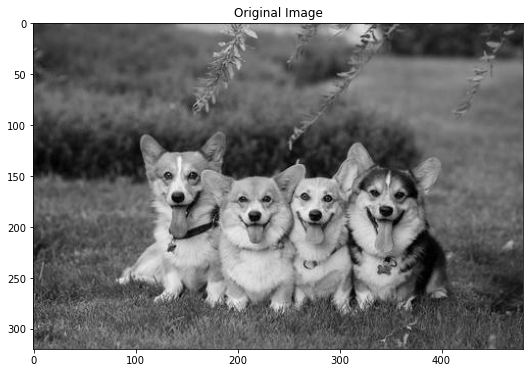

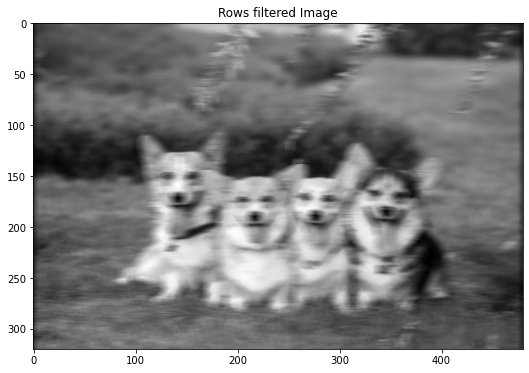

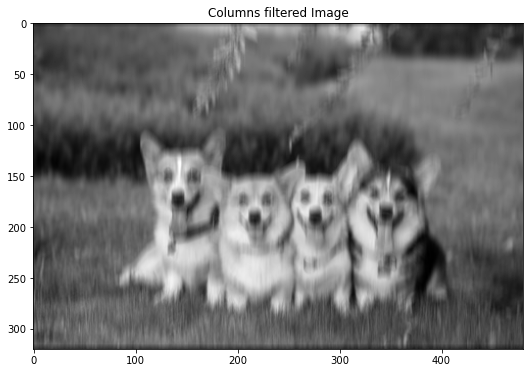

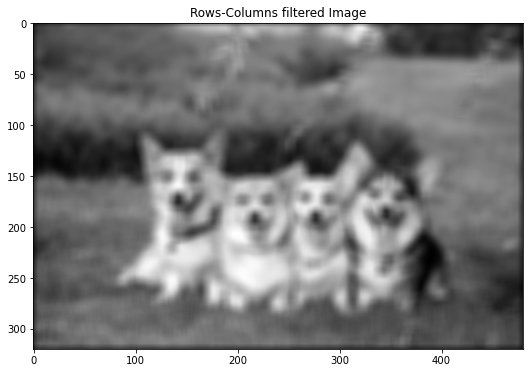

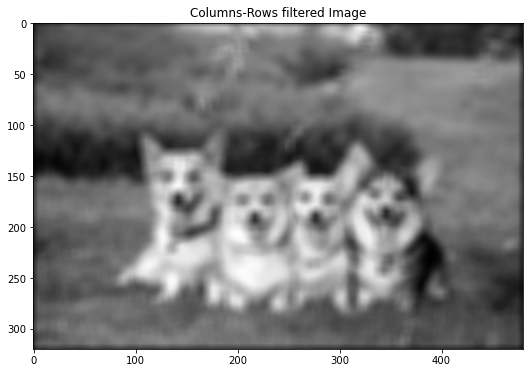

In [222]:
#make filter and load image
image = imread('test-image.jpg')
plt.figure(figsize=(10,6))
plt.imshow(image,'gray')
plt.title('Original Image')
L = 11
h = np.ones(L) * 1/11
n_rows,n_cols = image.shape
#Code for 3.a along rows (apply filter to each row independently)
image_row = np.zeros(image.shape)
for i in range(n_rows):
    image_row[i,:] = signal.convolve(image[i,:], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(image_row, 'gray')
plt.title('Rows filtered Image')

#along the columns (3.b)
image_column = np.zeros(image.shape)
for i in range(n_cols):
    image_column[:,i] = signal.convolve(image[:,i], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(image_column, 'gray')
plt.title('Columns filtered Image')

#rows then columns (3.c)
image_row_column = np.zeros(image.shape)
for i in range(n_rows):
    image_row_column[i,:] = signal.convolve(image[i,:], h, 'same')
for j in range(n_cols):
    image_row_column[:,j] = signal.convolve(image_row_column[:,j], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(image_row_column, 'gray')
plt.title('Rows-Columns filtered Image')

#columns then rows (3.d)
image_column_row = np.zeros(image.shape)
for j in range(n_cols):
    image_column_row[:,j] = signal.convolve(image[:,j], h, 'same')
for i in range(n_rows):
    image_column_row[i,:] = signal.convolve(image_column_row[i,:], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(image_column_row, 'gray')
plt.title('Columns-Rows filtered Image')


Comments for 3.e:
The images generated by the "rows then columns" and "columns then rows" procedures are the same. Because two convolution operators have commutativity property. Switching their order leads to the same result.


## Exercise 4: Building an Edge Detector

Let's now apply image convolution to perform edge detection. We will build a simple edge detector step-by-step using the following simple 1D filter:

$$
h[n] = \delta[n+1] - \delta[n-1]
$$

a. Intuitively or mathematically, what does this filter do to an input signal? In other words, what parts of a signal would give a strong (large magnitude) response and what parts would give a weak (small magnitude) response? You may answer this with a couple signal examples and the result of convolution with $h[n]$ or qualitative intuition.

b. Is this filter causal? Why or why not? Is it a problem if the filter is non-causal? (Hint: consider the contexts in which we cannot violate causality!)

Note: For the next two parts, please store your results in separate variables. This will make part (e) much cleaner.

c. Apply $h[n]$ along the rows of the ``test-image.jpg`` image. Plot the result with a grayscale color mapping.

d. Apply $h[n]$ along the columns of the ``test-image.jpg`` image. Plot the result with a grascale color mapping.

So far we have checked for edge-like features in the image going along the rows and columns. Imagine these two results as being vectors indicating edge strength along the row axis and column axis of the image, respectively. Take a minute to look at the differences between these two resulting images. Can you tell which one is detecting edges within a row and which one is doing so within a column? What would be a sensible way to incorporate these two dimensions of information? Imagine they form a 2D vector and take the norm! More precisely:

$$
I_F(r,c) = \sqrt{\left(I_R(r,c)\right)^2 + \left(I_C(r,c)\right)^2},
$$

where $I_R$ and $I_C$ are the row and column filtered results, respectively.

e. Build the final result image $I_F$ according to the above equation. Plot the result again with a grayscale color mapping.

Answer for 4.a here:
Intuitively, this filter compares the difference between the signal sizes on both sides of the current position. Subtract the signal value on the right from the signal value on the left. For example, after a series of discrete signals [0, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, -10] are processed by the current filter, for the long continuous part , the output will be 0, and at the edge of the change, the signal will change after the filter. The larger the change of the original signal, the larger the output value after processing, the smaller the signal change, the smaller the output signal value, when there is no change, the output is 0. And, according to the increasing direction of the time series, if the change is positive, the output is negative, and if the change is negative, the output is positive. So, [0, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1 , 1, 1, -10] after filter produces [0, 0, -3, -3, 0, 0, 0, 1, 2, 1, 0, 0, 11].

Answer for 4.b here: Obviously, this is a non-casual filter. Because h[n] is affected by x[n+1] whose footnote is greater than n. So, he is non-casual. Of course, this doesn't become a problem because our processing objects are not time-series, and they are images. We have data for all pixels at the same time. Therefore, we only need to take one data in the spatial dimension.



Text(0.5, 1.0, 'Normalized Filter Image')

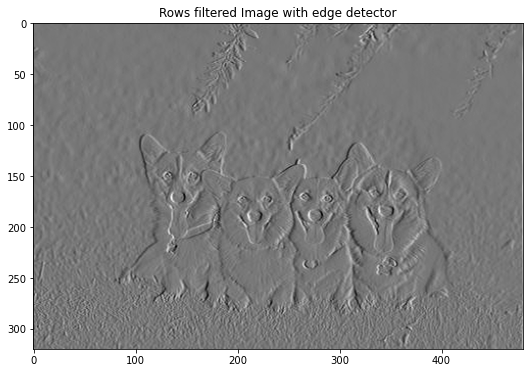

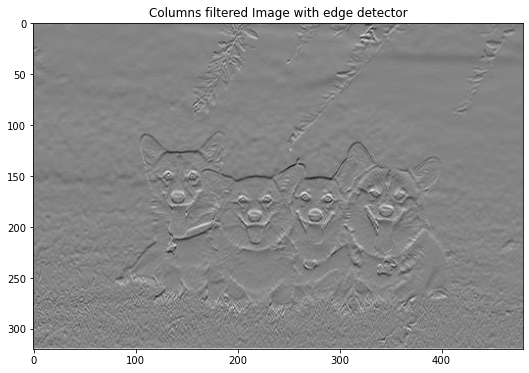

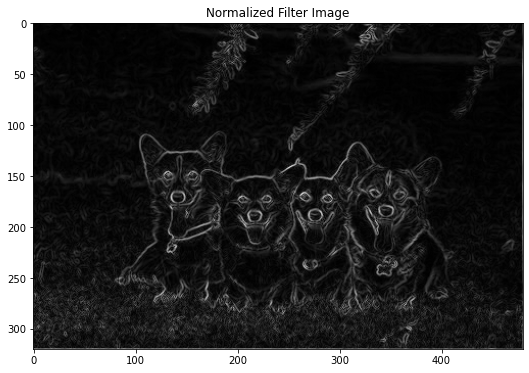

In [223]:
#load test-image.jpg
test = imread('test-image.jpg')
n_rows,n_cols = test.shape
h = np.array([-1,0,1])
#Code for 4.c here:
test_row = np.zeros(test.shape)
for i in range(n_rows):
    test_row[i,:] = signal.convolve(test[i,:], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(test_row, 'gray')
plt.title('Rows filtered Image with edge detector')

#Code for 4.d here:
test_column = np.zeros(test.shape)
for j in range(n_cols):
    test_column[:,j] = signal.convolve(test[:,j], h, 'same')
plt.figure(figsize=(10,6))
plt.imshow(test_column, 'gray')
plt.title('Columns filtered Image with edge detector')

#Code for 4.e here:
test_normal = np.zeros(test.shape) 
for i in range(n_rows):
    for j in range(n_cols):
        test_normal[i,j] = np.sqrt((test_row[i,j]**2)+(test_column[i,j]**2))

plt.figure(figsize=(10,6))
plt.imshow(test_normal, 'gray')
plt.title('Normalized Filter Image')


## 2D Image Convolution

We don't need to limit ourselves to 1D image convolution. Our filters or "kernels" can be in two dimensions also! We will not spend much time on the math of 2D convolution/filtering in this class because it is best left for ECE 418 (Image and Video Processing); still,  we can use Python to try it out. But let's try something other than filtering this time!

Image convolution is not just for filtering or modifying an image. We can also use convolution to extract information from an image. Remember that convolution is is the process of "flipping and shifting" one signal over another signal. At each shift location, we perform a dot product (or inner product) to see how $\textit{similar}$ the signals are. A larger value at the output means the two signals were more similar. The following image illustrates 2D convolution.

<img src="convolution.jpg">

More formally, say we have a $3x3$ convolution kernel $\mathcal{K}$ where the center pixel is at index $(0,0)$, the result of the 2D convolution at pixel $(i,j)$ for image $I$ is given by:

$$
O(i,j) = \sum_{k=-1}^{1}\sum_{l=-1}^{1}I(i-k,j-l)\cdot\mathcal{K}(k,l)
$$

Now, why is this useful? Suppose you want to design a system to recognize handwritten digits. How can you tell the difference between a "1" and a "4", for example? Think about how you as a human can separate these numbers! They both typically have one large vertical line down the middle, but we know we can differentiate them because a "4" has another shorter vertical line (depending how you draw it) and a horizontal line connecting them. This is where 2D convolution can help us! How about we create convolution kernels to highlight features we know to be discriminative, like horizontal and vertical lines.

The below code cell includes a function to perform 2D image convolution on a target image given a convolution kernel. We have also provided two 2D kernels: one for horizontal features and another for vertical features.

In [224]:
def convolve_2d(image,kernel):
    result = signal.convolve2d(image,kernel,'same')
    result[result < 0] = 0 #Keep values non-negative
    return result

#identify horizontal lines
horiz_kernel = np.array([[-2,-2,-2,-2,-2],
                        [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [-2,-2,-2,-2,-2]])
#identify vertical lines
vert_kernel = np.array([[-2,1,1,1,-2],
                        [-2,1,1,1,-2],
                        [-2,1,1,1,-2],
                        [-2,1,1,1,-2],
                        [-2,1,1,1,-2]])

In the folder for this lab, we have provided example images of the numbers "1", "4", and "8" from the popular MNIST dataset. These images are 28x28 and grayscale. Let's see what our filters can identify in the ``one.jpg`` image! Note the different scales on the feature image colorbars.

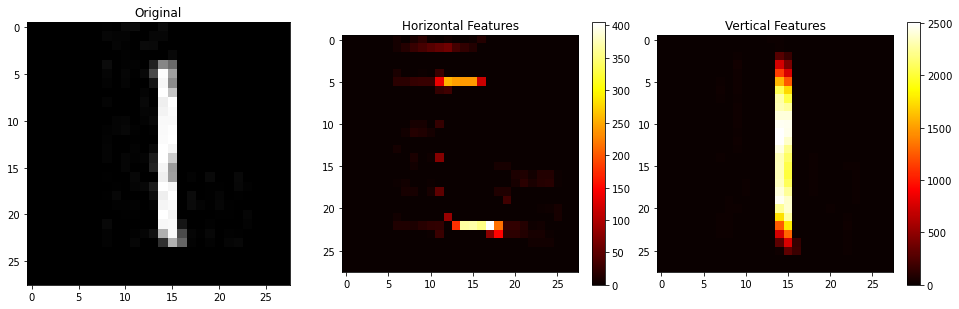

In [225]:
one = imread('one.jpg')

plt.figure(figsize = (16,10))
plt.subplot(131)
plt.title('Original')
plt.imshow(one,'gray')

one_horiz = convolve_2d(one,horiz_kernel)
plt.subplot(132)
plt.title('Horizontal Features')
plt.imshow(one_horiz,'hot')
plt.colorbar(fraction=0.05)

one_vert = convolve_2d(one,vert_kernel)
plt.subplot(133)
plt.title('Vertical Features')
plt.imshow(one_vert,'hot')
plt.colorbar(fraction=0.05)

## Exercise 5: 2D Image Convolution for Feature Detection

a. Create similar plots as the above example for the "1" image for the "4" (``four.jpg``) and "8" (``eight.jpg``) images in the following code cell.

b. Comment on the results and compare what is highlighted for each number.

c. What is the significance of having negative kernel values around the positive "feature highlighting" values? Think about what would happen if the negative values were zeros instead. Try playing around with the kernels or creating your own kernel if you are unsure.


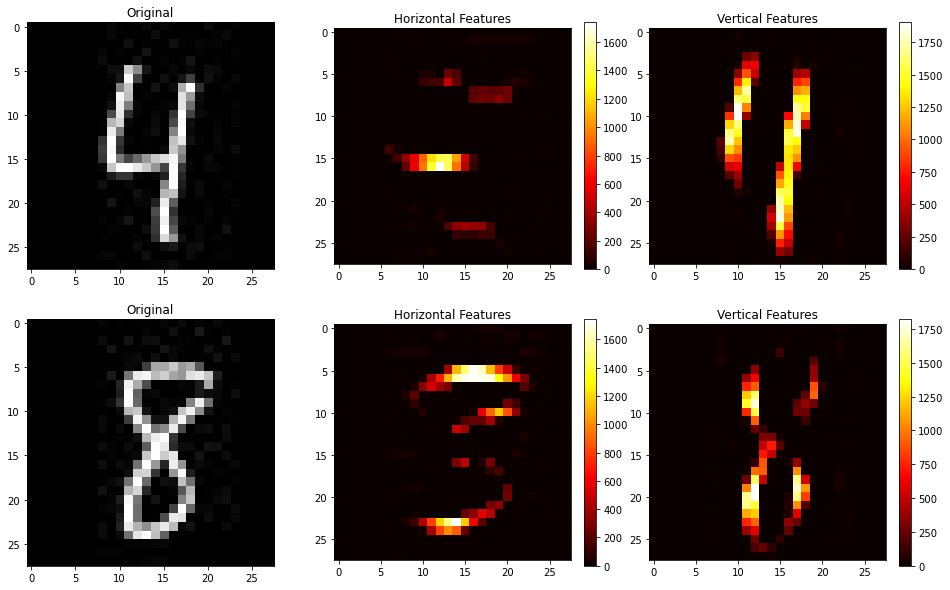

In [226]:
# Code for 5.a here
four = imread('four.jpg')

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Original')
plt.imshow(four,'gray')

four_horiz = convolve_2d(four,horiz_kernel)
plt.subplot(232)
plt.title('Horizontal Features')
plt.imshow(four_horiz,'hot')
plt.colorbar(fraction=0.05)

four_vert = convolve_2d(four,vert_kernel)
plt.subplot(233)
plt.title('Vertical Features')
plt.imshow(four_vert,'hot')
plt.colorbar(fraction=0.05)

eight = imread('eight.jpg')

plt.subplot(234)
plt.title('Original')
plt.imshow(eight,'gray')

eight_horiz = convolve_2d(eight,horiz_kernel)
plt.subplot(235)
plt.title('Horizontal Features')
plt.imshow(eight_horiz,'hot')
plt.colorbar(fraction=0.05)

eight_vert = convolve_2d(eight,vert_kernel)
plt.subplot(236)
plt.title('Vertical Features')
plt.imshow(eight_vert,'hot')
plt.colorbar(fraction=0.05)

Answer for 5b: We can see that among the generated images of each digit, the image generated by horiz_kernel highlights the horizontal handwriting of each digit, while the image generated by vert_kernel highlights the vertical handwriting of the digit. Also, the corresponding opposite strokes are hidden and blended into the black background. In addition, the strokes have a color change from the inside to the outside, from white to yellow, then to red, and finally to black, just like roasted red steel bars.

Answer for 5c: I tried replacing all negative values in the kernel with 0 and the image was generated. I found that the newly generated images are noticeably different. Because all the opposite strokes that should be black have turned into dark red, the corresponding strokes that should be strengthened still have traces of being highlighted, but the opposite strokes have not been hidden, and the outline of the entire figure is relatively clear, and the brightness of the entire digital image is significantly improved. Therefore, the corresponding highlighting effect is not as good as the original kernel. So, I think the point of a negative value is to make sure that the vertical stroke is reduced to a small enough value. At zero, the positive values of surrounding pixels will supplement the current pixel to a certain extent, so that it cannot be fully hidden. Only when it is negative, the strokes in the desired direction can be emphasized, while the vertical direction is hidden to black.



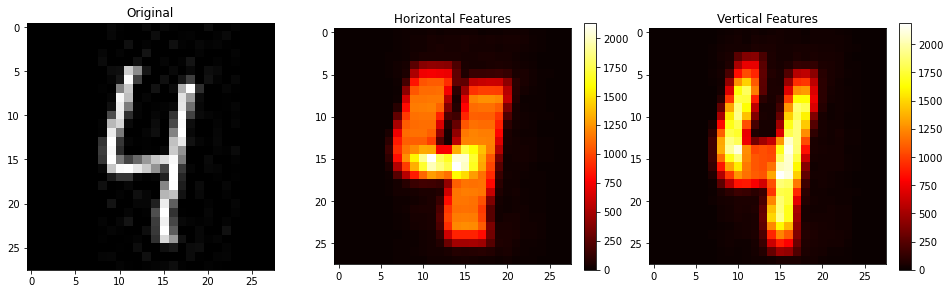

In [227]:
horiz_kernel = np.array([[0,0,0,0,0],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [0,0,0,0,0]])
vert_kernel = np.array([[0,1,1,1,0],
                        [0,1,1,1,0],
                        [0,1,1,1,0],
                        [0,1,1,1,0],
                        [0,1,1,1,0]])

four = imread('four.jpg')

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Original')
plt.imshow(four,'gray')

four_horiz = convolve_2d(four,horiz_kernel)
plt.subplot(232)
plt.title('Horizontal Features')
plt.imshow(four_horiz,'hot')
plt.colorbar(fraction=0.05)

four_vert = convolve_2d(four,vert_kernel)
plt.subplot(233)
plt.title('Vertical Features')
plt.imshow(four_vert,'hot')
plt.colorbar(fraction=0.05)

For the final activity, we will explore an example of a non-linear system. First, a bit of background.

There are many different types of noise that can appear in images. One such type is salt-and-pepper noise. This noise occurs when pixels in a camera or an existing image become fully active or inactive. In other words, a normal pixel either takes on its minimum or maximum possible value. The following code cell shows an original image and a version of it that has been corrupted by 20% salt-and-pepper noise (20% of the pixels are affected). In this activity, we will see whether we can use our LSI systems from before to denoise our image.

Text(0.5, 1.0, 'Image with 20% Salt-and-Pepper Noise')

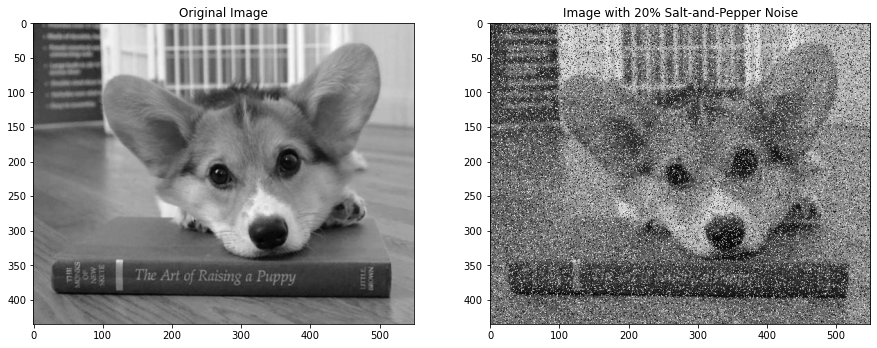

In [228]:
clean_image = imread('clean-image.jpg')
noisy_image = imread('noisy-image.jpg')
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(clean_image,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(noisy_image,'gray')
plt.title('Image with 20% Salt-and-Pepper Noise')

## Exercise 6: Non-Linear Systems are Cool Too!

We will attempt to use two different filters: a 5x5 mean filter and a 5x5 median filter. Note that a median filter is a non-linear system! A 5x5 median filter simply takes the median of the 25 pixels surrounding the center pixel in the filter and assigns that value to the center pixel.

a. Explain/prove why the median filter is a non-linear system. You may write your answer with respect to a one-dimensional median filter. 

b. Apply a 5x5 mean filter to the noisy image and plot the result. You can do this two different ways. You can apply a length-5 mean filter along the rows and columns in any order or use our $\textrm{convolve_2d()}$ function from before with an appropriate filter you create.

c. Apply a 5x5 median filter to the noisy image and plot the result. Use $\textrm{signal.medfilt()}$ to perform the filtering. Look up the scipy documentation for notes on this function's usage.

d. Comment on the differences. Which filter seems to work better? Why do you think so?

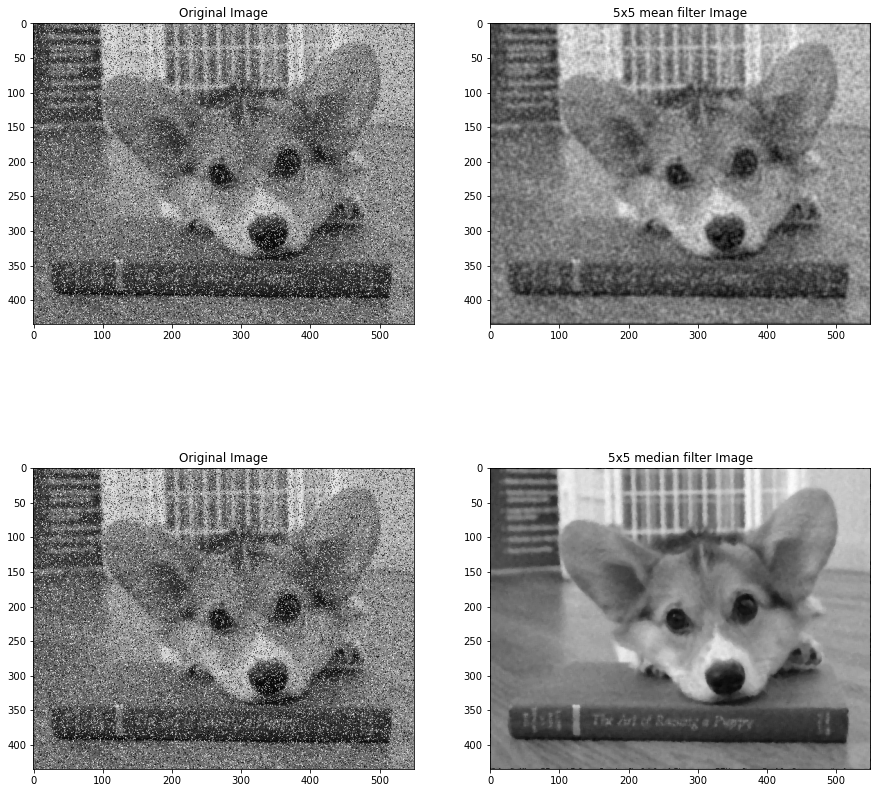

In [229]:
# Code for 6.b
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(noisy_image,'gray')
mean_filter = np.ones((5,5))/25
noisy_image_mean = convolve_2d(noisy_image, mean_filter)
plt.subplot(222)
plt.title('5x5 mean filter Image')
plt.imshow(noisy_image_mean, 'gray')
# Code for 6.c
plt.subplot(223)
plt.title('Original Image')
plt.imshow(noisy_image,'gray')
noisy_image_median = signal.medfilt(noisy_image, 5)
plt.subplot(224)
plt.title('5x5 median filter Image')
plt.imshow(noisy_image_median, 'gray')


Answer for 6.a here: We use one-dimensional data to illustrate. Because, the median filter returns the median in the data, and the input data is not necessarily sorted by size. When we add two strings of weighted signals together, the original median of one signal may be affected by the extreme value of another signal, so the final intermediate value returned may not be generated by the signal at the original position . For example, if we take the signals x1 = [-1,10,20] and x2 = [-20, 100, 0], they return 10 and 0. If the system is linear, we add the two signals together and we get a median of 10, but, x3 = x1 + x2 = [-21, 110, 20], the median is 20. This is because as long as the medians of the two signals are not added together, the final result will not be linear.

Answer for 6.d here: Obviously, choosing the median filter for processing has better results, and the problem of noise has been greatly improved. This is because a significant benefit of the median when dealing with data is that it avoids the effects of extreme data. For example, the white spots in the original image are some extreme values. Using the average value will obviously make the average color brighter by the white spots, and the median filter will greatly ignore these abnormal color points. So, the median filter works better.

## Submission Instructions

Make sure to place all image and data files along with your .ipynb lab report (this file) in one folder, zip the folder, and submit it to Canvas under the Lab 2 assignment. Please name the zip file ``<netid>_Lab2``.